In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(output_dim = 7, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4410 images belonging to 7 classes.
Found 1475 images belonging to 7 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 4410,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 1475)

Epoch 1/100
137/137 [==============================] - 993s 7s/step - loss: 1.5628 - acc: 0.3929 - precision: 0.5533 - recall: 0.1415 - val_loss: 1.2095 - val_acc: 0.5665 - val_precision: 0.7853 - val_recall: 0.2206
Epoch 2/100
137/137 [==============================] - 1266s 9s/step - loss: 1.2770 - acc: 0.5051 - precision: 0.6919 - recall: 0.2861 - val_loss: 1.0006 - val_acc: 0.6136 - val_precision: 0.7737 - val_recall: 0.3900
Epoch 3/100
137/137 [==============================] - 1831s 13s/step - loss: 1.1648 - acc: 0.5520 - precision: 0.7100 - recall: 0.3584 - val_loss: 0.9996 - val_acc: 0.6202 - val_precision: 0.7643 - val_recall: 0.3972
Epoch 4/100
137/137 [==============================] - 1842s 13s/step - loss: 1.0854 - acc: 0.5749 - precision: 0.7181 - recall: 0.3954 - val_loss: 0.7919 - val_acc: 0.7193 - val_precision: 0.8122 - val_recall: 0.5350
Epoch 5/100
137/137 [==============================] - 1834s 13s/step - loss: 1.0322 - acc: 0.6031 - precision: 0.7268 - recall: 0.

137/137 [==============================] - 1832s 13s/step - loss: 0.4229 - acc: 0.8409 - precision: 0.8710 - recall: 0.8081 - val_loss: 0.1069 - val_acc: 0.9688 - val_precision: 0.9780 - val_recall: 0.9613
Epoch 39/100
137/137 [==============================] - 1843s 13s/step - loss: 0.4381 - acc: 0.8296 - precision: 0.8623 - recall: 0.8006 - val_loss: 0.1082 - val_acc: 0.9709 - val_precision: 0.9741 - val_recall: 0.9661
Epoch 40/100
137/137 [==============================] - 1838s 13s/step - loss: 0.4066 - acc: 0.8456 - precision: 0.8738 - recall: 0.8195 - val_loss: 0.0965 - val_acc: 0.9750 - val_precision: 0.9802 - val_recall: 0.9688
Epoch 41/100
137/137 [==============================] - 1838s 13s/step - loss: 0.3972 - acc: 0.8460 - precision: 0.8737 - recall: 0.8205 - val_loss: 0.1012 - val_acc: 0.9668 - val_precision: 0.9713 - val_recall: 0.9628
Epoch 42/100
137/137 [==============================] - 1841s 13s/step - loss: 0.4016 - acc: 0.8489 - precision: 0.8708 - recall: 0.8204 

137/137 [==============================] - 1851s 14s/step - loss: 0.3014 - acc: 0.8926 - precision: 0.9105 - recall: 0.8749 - val_loss: 0.0376 - val_acc: 0.9926 - val_precision: 0.9959 - val_recall: 0.9913
Epoch 76/100
137/137 [==============================] - 1868s 14s/step - loss: 0.2748 - acc: 0.8982 - precision: 0.9141 - recall: 0.8847 - val_loss: 0.0484 - val_acc: 0.9865 - val_precision: 0.9878 - val_recall: 0.9844
Epoch 77/100
137/137 [==============================] - 1852s 14s/step - loss: 0.2952 - acc: 0.8992 - precision: 0.9151 - recall: 0.8840 - val_loss: 0.0428 - val_acc: 0.9946 - val_precision: 0.9952 - val_recall: 0.9919
Epoch 78/100
137/137 [==============================] - 1860s 14s/step - loss: 0.2999 - acc: 0.8859 - precision: 0.9030 - recall: 0.8711 - val_loss: 0.0413 - val_acc: 0.9946 - val_precision: 0.9946 - val_recall: 0.9933
Epoch 79/100
137/137 [==============================] - 1861s 14s/step - loss: 0.2707 - acc: 0.8941 - precision: 0.9092 - recall: 0.8788 

In [5]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [6]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      anger       0.23      0.23      0.23       350
    boredom       0.19      0.19      0.19       223
    disgust       0.08      0.08      0.08       130
       fear       0.15      0.14      0.15       187
  happiness       0.14      0.15      0.15       196
    neutral       0.15      0.16      0.16       218
    sadness       0.08      0.08      0.08       171

avg / total       0.16      0.16      0.16      1475



Confusion matrix, without normalization
[[82 54 32 43 42 57 40]
 [58 42 22 24 32 29 16]
 [18 21 11 10 28 24 18]
 [50 25 16 27 18 28 23]
 [51 24 21 24 29 26 21]
 [49 20 16 28 31 34 40]
 [44 32 17 22 21 22 13]]


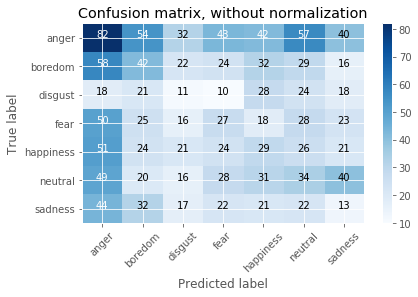

Normalized confusion matrix
[[23.4286 15.4286  9.1429 12.2857 12.     16.2857 11.4286]
 [26.009  18.8341  9.8655 10.7623 14.3498 13.0045  7.1749]
 [13.8462 16.1538  8.4615  7.6923 21.5385 18.4615 13.8462]
 [26.738  13.369   8.5561 14.4385  9.6257 14.9733 12.2995]
 [26.0204 12.2449 10.7143 12.2449 14.7959 13.2653 10.7143]
 [22.4771  9.1743  7.3394 12.844  14.2202 15.5963 18.3486]
 [25.731  18.7135  9.9415 12.8655 12.2807 12.8655  7.6023]]


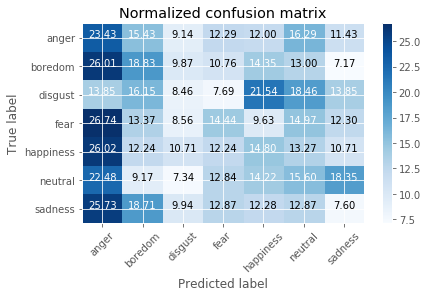

In [10]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn.png")
plt.show()

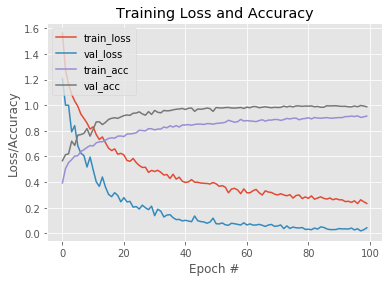

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn.png")